In [6]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
# Ana veri setini okuyun
data = pd.read_excel('Kumeyenı_1_veri_seti.xlsx')  # Ana veri seti dosya adını ve yolunu güncelleyin


In [8]:
# Eksik bilgileri içeren dosyayı okuyun
ek_bilgiler = pd.read_excel('TR.xlsx')  # Eksik bilgiler dosya adını ve yolunu güncelleyin

# Ana veri setine eksik bilgileri ekleyin
data = pd.concat([data, ek_bilgiler[['Enlem', 'Boylam', 'Aylar']]], axis=1)

In [9]:
data


,Mw,R,Kume,Enlem,Boylam,Aylar
0,3.1,5.0,0.0,36.2608,31.6478,10
1,4.2,5.5,0.0,38.0863,36.6297,10
2,3.1,5.0,0.0,38.0105,36.4315,10
3,3.2,6.3,0.0,38.0163,37.4432,10
4,3.9,4.7,0.0,38.0758,36.5587,10
...,...,...,...,...,...,...
12768,NaN,NaN,NaN,38.7000,41.5000,5
12769,NaN,NaN,NaN,39.1000,42.5000,4
12770,NaN,NaN,NaN,39.0000,28.0000,4
12771,NaN,NaN,NaN,39.8000,30.5000,5


In [10]:
# NaN değerleri sayın
nan_sayisi = data.isna().sum().sum()

print(f"Veri setinde toplam {nan_sayisi} NaN değer bulunmaktadır.")

Veri setinde toplam 2127 NaN değer bulunmaktadır.


In [11]:
cluster_1 = data.dropna()

In [12]:
cluster_1 = cluster_1.drop(columns=["Kume"])

In [13]:
cluster_1 

,Mw,R,Enlem,Boylam,Aylar
0,3.1,5.0,36.2608,31.6478,10
1,4.2,5.5,38.0863,36.6297,10
2,3.1,5.0,38.0105,36.4315,10
3,3.2,6.3,38.0163,37.4432,10
4,3.9,4.7,38.0758,36.5587,10
...,...,...,...,...,...
12059,5.2,30.0,36.5400,26.3200,7
12060,6.2,30.0,36.4600,26.0000,7
12061,5.6,20.0,36.6800,26.0500,7
12062,5.3,15.0,36.9000,26.0000,7


### Linear Regressor

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
import numpy as np
import pandas as pd

In [15]:
# Cluster_1 veri setini oku
cluster_1

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Çoklu lineer regresyon modellerini oluştur ve eğit
model_mw = LinearRegression()
model_mw.fit(X_train, y_mw_train)

model_r = LinearRegression()
model_r.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred = model_mw.predict(X_test)
r_pred = model_r.predict(X_test)

# R-Kare (R²) değerlerini hesapla
r2_mw = r2_score(y_mw_test, mw_pred)
r2_r = r2_score(y_r_test, r_pred)


# Hata ölçümlerini yazdır
mse_mw = mean_squared_error(y_mw_test, mw_pred)
mse_r = mean_squared_error(y_r_test, r_pred)

print(f"MW Model MSE: {mse_mw}")
print(f"R Model MSE: {mse_r}")

print(f"MW Model R²: {r2_mw}")
print(f"R Model R²: {r2_r}")

MW Model MSE: 0.4442196488397008
R Model MSE: 52.57995280721608
MW Model R²: 0.005714692199996874
R Model R²: 0.018139607269931135


### Polinom Regresyonu

In [16]:
# Cluster_1 veri setini oku
cluster_1

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Polinom regresyon modellerini oluştur ve eğit
degree = 2  # Polinom derecesini belirle

# MW için polinom regresyon modeli
model_mw = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_mw.fit(X_train, y_mw_train)

# R için polinom regresyon modeli
model_r = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_r.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred = model_mw.predict(X_test)
r_pred = model_r.predict(X_test)

# R-Kare (R²) değerlerini hesapla
r2_mw = r2_score(y_mw_test, mw_pred)
r2_r = r2_score(y_r_test, r_pred)

# Hata ölçümlerini ve R-Kare değerlerini yazdır
mse_mw = mean_squared_error(y_mw_test, mw_pred)
mse_r = mean_squared_error(y_r_test, r_pred)

print(f"MW Model MSE: {mse_mw}")
print(f"R Model MSE: {mse_r}")

print(f"MW Model R²: {r2_mw}")
print(f"R Model R²: {r2_r}")

MW Model MSE: 0.44630948750707455
R Model MSE: 52.4772692464497
MW Model R²: 0.001037060564229364
R Model R²: 0.020057085622767534


### Destek Vektör Regresyon (SVR):

In [17]:
cluster_1

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR modellerini oluştur ve eğit
model_mw = SVR()
model_mw.fit(X_train_scaled, y_mw_train)

model_r = SVR()
model_r.fit(X_train_scaled, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred = model_mw.predict(X_test_scaled)
r_pred = model_r.predict(X_test_scaled)

# R-Kare (R²) değerlerini hesapla
r2_mw = r2_score(y_mw_test, mw_pred)
r2_r = r2_score(y_r_test, r_pred)

# Hata ölçümlerini ve R-Kare değerlerini yazdır
mse_mw = mean_squared_error(y_mw_test, mw_pred)
mse_r = mean_squared_error(y_r_test, r_pred)

print(f"MW Model MSE: {mse_mw}")
print(f"R Model MSE: {mse_r}")

print(f"MW Model R²: {r2_mw}")
print(f"R Model R²: {r2_r}")

MW Model MSE: 0.44861274747820906
R Model MSE: 55.027028390806926
MW Model R²: -0.004118266435205742
R Model R²: -0.027556260932044996


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
cluster_1

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Karar ağacı modellerini oluştur ve eğit
model_mw = DecisionTreeRegressor(random_state=42)
model_mw.fit(X_train, y_mw_train)

model_r = DecisionTreeRegressor(random_state=42)
model_r.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred = model_mw.predict(X_test)
r_pred = model_r.predict(X_test)

# R-Kare (R²) değerlerini hesapla
r2_mw = r2_score(y_mw_test, mw_pred)
r2_r = r2_score(y_r_test, r_pred)

# Hata ölçümlerini yazdır
mse_mw = mean_squared_error(y_mw_test, mw_pred)
mse_r = mean_squared_error(y_r_test, r_pred)

print(f"MW Model MSE: {mse_mw}")
print(f"R Model MSE: {mse_r}")
print(f"MW Model R²: {r2_mw}")
print(f"R Model R²: {r2_r}")

MW Model MSE: 0.7184158723580606
R Model MSE: 83.1096353087443
MW Model R²: -0.6080115966092825
R Model R²: -0.5519614379094193


### Random forest

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cluster_1 veri setini oku
cluster_1 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Random Forest modelini oluştur ve eğit
model_mw_rf = RandomForestRegressor()
model_r_rf = RandomForestRegressor()

model_mw_rf.fit(X_train, y_mw_train)
model_r_rf.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_rf = model_mw_rf.predict(X_test)
r_pred_rf = model_r_rf.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_rf = mean_squared_error(y_mw_test, mw_pred_rf)
mse_r_rf = mean_squared_error(y_r_test, r_pred_rf)

print("Random Forest Results:")
print(f"MW Model MSE: {mse_mw_rf}")
print(f"R Model MSE: {mse_r_rf}")

# R-Kare (R²) değerlerini hesapla
r2_mw_rf = r2_score(y_mw_test, mw_pred_rf)
r2_r_rf = r2_score(y_r_test, r_pred_rf)

print(f"MW Model R²: {r2_mw_rf}")
print(f"R Model R²: {r2_r_rf}")


Random Forest Results:
MW Model MSE: 0.39884615900215176
R Model MSE: 47.55129017032242
MW Model R²: 0.10727299658145717
R Model R²: 0.11204316571682682


###  Gradient Boosting Regresyon

In [21]:

from sklearn.ensemble import GradientBoostingRegressor


# Cluster_1 veri setini oku 
cluster_1 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Gradient Boosting Regresyon modelini oluştur ve eğit
model_mw_gb = GradientBoostingRegressor()
model_r_gb = GradientBoostingRegressor()

model_mw_gb.fit(X_train, y_mw_train)
model_r_gb.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_gb = model_mw_gb.predict(X_test)
r_pred_gb = model_r_gb.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_gb = mean_squared_error(y_mw_test, mw_pred_gb)
mse_r_gb = mean_squared_error(y_r_test, r_pred_gb)

print("Gradient Boosting Results:")
print(f"MW Model MSE: {mse_mw_gb}")
print(f"R Model MSE: {mse_r_gb}")

# R-Kare (R²) değerlerini hesapla
r2_mw_gb = r2_score(y_mw_test, mw_pred_gb)
r2_r_gb = r2_score(y_r_test, r_pred_gb)

print(f"MW Model R²: {r2_mw_gb}")
print(f"R Model R²: {r2_r_gb}")


Gradient Boosting Results:
MW Model MSE: 0.39210304530442963
R Model MSE: 46.1455070795179
MW Model R²: 0.12236593291595388
R Model R²: 0.13829428736943472


### Ridge regressor

In [22]:

from sklearn.linear_model import Ridge


# Cluster_1 veri setini oku 
cluster_1 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Ridge Regresyon modelini oluştur ve eğit
alpha_value = 1.0  # alpha parametresi, düzenlileştirme miktarını kontrol eder
model_mw_ridge = Ridge(alpha=alpha_value)
model_r_ridge = Ridge(alpha=alpha_value)

model_mw_ridge.fit(X_train, y_mw_train)
model_r_ridge.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_ridge = model_mw_ridge.predict(X_test)
r_pred_ridge = model_r_ridge.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_ridge = mean_squared_error(y_mw_test, mw_pred_ridge)
mse_r_ridge = mean_squared_error(y_r_test, r_pred_ridge)

print("Ridge Regression Results:")
print(f"MW Model MSE: {mse_mw_ridge}")
print(f"R Model MSE: {mse_r_ridge}")

# R-Kare (R²) değerlerini hesapla
r2_mw_ridge = r2_score(y_mw_test, mw_pred_ridge)
r2_r_ridge = r2_score(y_r_test, r_pred_ridge)

print(f"MW Model R²: {r2_mw_ridge}")
print(f"R Model R²: {r2_r_ridge}")


Ridge Regression Results:
MW Model MSE: 0.44421960331072535
R Model MSE: 52.57995633209449
MW Model R²: 0.0057147941063205865
R Model R²: 0.018139541447534602


### Lasso Regressor 

In [23]:

from sklearn.linear_model import Lasso


# Cluster_1 veri setini oku 
cluster_1 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Lasso Regresyon modelini oluştur ve eğit
alpha_value = 1.0  # alpha parametresi, düzenlileştirme miktarını kontrol eder
model_mw_lasso = Lasso(alpha=alpha_value)
model_r_lasso = Lasso(alpha=alpha_value)

model_mw_lasso.fit(X_train, y_mw_train)
model_r_lasso.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_lasso = model_mw_lasso.predict(X_test)
r_pred_lasso = model_r_lasso.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_lasso = mean_squared_error(y_mw_test, mw_pred_lasso)
mse_r_lasso = mean_squared_error(y_r_test, r_pred_lasso)

print("Lasso Regression Results:")
print(f"MW Model MSE: {mse_mw_lasso}")
print(f"R Model MSE: {mse_r_lasso}")

# R-Kare (R²) değerlerini hesapla
r2_mw_lasso = r2_score(y_mw_test, mw_pred_lasso)
r2_r_lasso = r2_score(y_r_test, r_pred_lasso)

print(f"MW Model R²: {r2_mw_lasso}")
print(f"R Model R²: {r2_r_lasso}")


Lasso Regression Results:
MW Model MSE: 0.44682008917775906
R Model MSE: 52.92200461349029
MW Model R²: -0.00010580589975028865
R Model R²: 0.011752246633191854


### Elastic Net Regresyon:

In [24]:

from sklearn.linear_model import ElasticNet

# Cluster_1 veri setini oku 
cluster_1 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Elastic Net Regresyon modelini oluştur ve eğit
alpha_value = 1.0  # alpha parametresi, düzenlileştirme miktarını kontrol eder
l1_ratio_value = 0.5  # l1_ratio parametresi, L1 düzenlileştirmenin oranını belirler
model_mw_en = ElasticNet(alpha=alpha_value, l1_ratio=l1_ratio_value)
model_r_en = ElasticNet(alpha=alpha_value, l1_ratio=l1_ratio_value)

model_mw_en.fit(X_train, y_mw_train)
model_r_en.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_en = model_mw_en.predict(X_test)
r_pred_en = model_r_en.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_en = mean_squared_error(y_mw_test, mw_pred_en)
mse_r_en = mean_squared_error(y_r_test, r_pred_en)

print("Elastic Net Regression Results:")
print(f"MW Model MSE: {mse_mw_en}")
print(f"R Model MSE: {mse_r_en}")

# R-Kare (R²) değerlerini hesapla
r2_mw_en = r2_score(y_mw_test, mw_pred_en)
r2_r_en = r2_score(y_r_test, r_pred_en)

print(f"MW Model R²: {r2_mw_en}")
print(f"R Model R²: {r2_r_en}")


Elastic Net Regression Results:
MW Model MSE: 0.44682008917775906
R Model MSE: 52.82408019997013
MW Model R²: -0.00010580589975028865
R Model R²: 0.013580854267536524


### Bayesian Regressor

In [25]:
from sklearn.linear_model import BayesianRidge

# Cluster_1 veri setini oku
cluster_1 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Bayesian Ridge Regresyon modelini oluştur ve eğit
model_mw_bayesian = BayesianRidge()
model_r_bayesian = BayesianRidge()

model_mw_bayesian.fit(X_train, y_mw_train)
model_r_bayesian.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_bayesian = model_mw_bayesian.predict(X_test)
r_pred_bayesian = model_r_bayesian.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_bayesian = mean_squared_error(y_mw_test, mw_pred_bayesian)
mse_r_bayesian = mean_squared_error(y_r_test, r_pred_bayesian)

print("Bayesian Ridge Regression Results:")
print(f"MW Model MSE: {mse_mw_bayesian}")
print(f"R Model MSE: {mse_r_bayesian}")

# R-Kare (R²) değerlerini hesapla
r2_mw_bayesian = r2_score(y_mw_test, mw_pred_bayesian)
r2_r_bayesian = r2_score(y_r_test, r_pred_bayesian)

print(f"MW Model R²: {r2_mw_bayesian}")
print(f"R Model R²: {r2_r_bayesian}")


Bayesian Ridge Regression Results:
MW Model MSE: 0.4441530902093024
R Model MSE: 52.58546358396512
MW Model R²: 0.005863668654517262
R Model R²: 0.01803670087435294


### Deep Learning 

 Dense (Fully Connected) Neural Networks:

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

In [27]:
cluster_1

,Mw,R,Enlem,Boylam,Aylar
0,3.1,5.0,36.2608,31.6478,10
1,4.2,5.5,38.0863,36.6297,10
2,3.1,5.0,38.0105,36.4315,10
3,3.2,6.3,38.0163,37.4432,10
4,3.9,4.7,38.0758,36.5587,10
...,...,...,...,...,...
12059,5.2,30.0,36.5400,26.3200,7
12060,6.2,30.0,36.4600,26.0000,7
12061,5.6,20.0,36.6800,26.0500,7
12062,5.3,15.0,36.9000,26.0000,7


In [28]:


# Cluster_1 veri setini oku
cluster_1 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_1['Mw']
y_r = cluster_1['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Verileri standartlaştır (önemli bir adım)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dense Neural Networks modelini oluştur ve eğit
def create_and_train_model(X_train_scaled, y_train, epochs=50, batch_size=32):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)
    
    return model

# MW Modeli için
model_mw_dense = create_and_train_model(X_train_scaled, y_mw_train)

# R Modeli için
model_r_dense = create_and_train_model(X_train_scaled, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_dense = model_mw_dense.predict(X_test_scaled).flatten()
r_pred_dense = model_r_dense.predict(X_test_scaled).flatten()

# Hata ölçümlerini yazdır
mse_mw_dense = mean_squared_error(y_mw_test, mw_pred_dense)
mse_r_dense = mean_squared_error(y_r_test, r_pred_dense)

# RMSE değerlerini hesapla
rmse_mw_dense = np.sqrt(mse_mw_dense)
rmse_r_dense = np.sqrt(mse_r_dense)

print("Dense Neural Networks Results:")
print(f"MW Model MSE: {mse_mw_dense}")
print(f"MW Model RMSE: {rmse_mw_dense}")
print(f"R Model MSE: {mse_r_dense}")
print(f"R Model RMSE: {rmse_r_dense}")

# R-Kare (R²) değerlerini hesapla
r2_mw_dense = r2_score(y_mw_test, mw_pred_dense)
r2_r_dense = r2_score(y_r_test, r_pred_dense)

print(f"MW Model R²: {r2_mw_dense}")
print(f"R Model R²: {r2_r_dense}")

# Tahmin sonuçlarını göster
result_df = pd.DataFrame({'Actual_MW': y_mw_test, 'Predicted_MW': mw_pred_dense, 'Actual_R': y_r_test, 'Predicted_R': r_pred_dense})
print(result_df)


Epoch 1/50
242/242 [==============================] - 1s 1ms/step - loss: 3.4057 - val_loss: 0.8152
Epoch 2/50
242/242 [==============================] - 0s 969us/step - loss: 0.6802 - val_loss: 0.6561
Epoch 3/50
242/242 [==============================] - 0s 967us/step - loss: 0.5590 - val_loss: 0.5410
Epoch 4/50
242/242 [==============================] - 0s 957us/step - loss: 0.5070 - val_loss: 0.5098
Epoch 5/50
242/242 [==============================] - 0s 976us/step - loss: 0.4885 - val_loss: 0.4984
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4788 - val_loss: 0.4923
Epoch 7/50
242/242 [==============================] - 0s 957us/step - loss: 0.4739 - val_loss: 0.4784
Epoch 8/50
242/242 [==============================] - 0s 945us/step - loss: 0.4713 - val_loss: 0.4743
Epoch 9/50
242/242 [==============================] - 0s 950us/step - loss: 0.4677 - val_loss: 0.4714
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4639 - va

In [29]:
#GRAFİK 

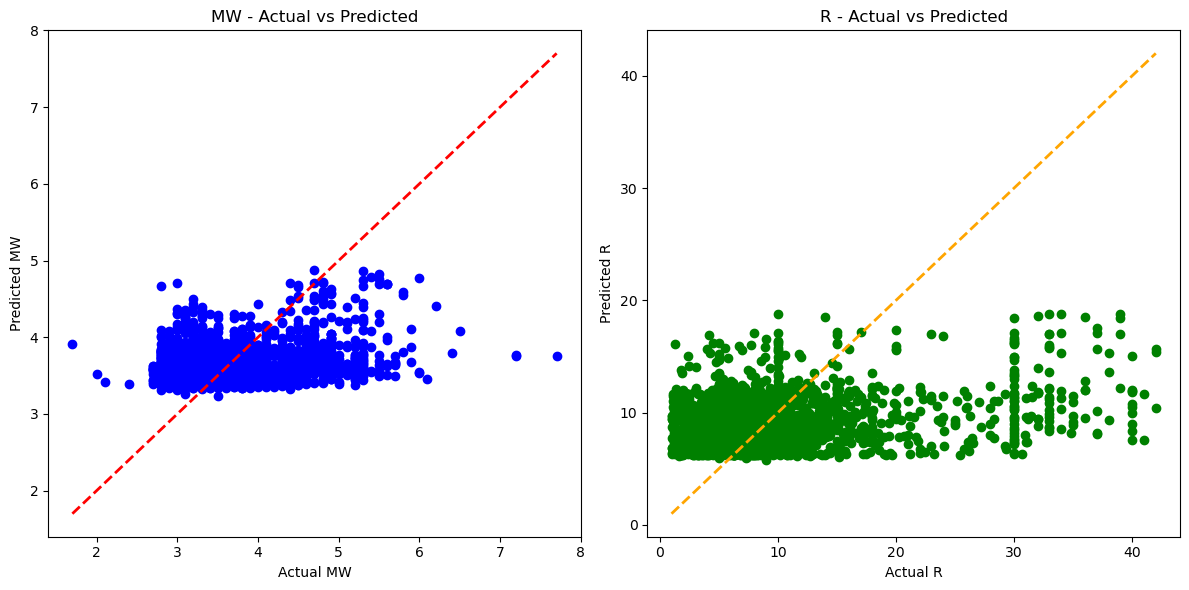

In [30]:
import matplotlib.pyplot as plt

# MW için Tahmin Sonuçları
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_mw_test, mw_pred_dense, color='blue')
plt.plot([min(y_mw_test), max(y_mw_test)], [min(y_mw_test), max(y_mw_test)], linestyle='--', color='red', linewidth=2)
plt.title('MW - Actual vs Predicted')
plt.xlabel('Actual MW')
plt.ylabel('Predicted MW')

# R için Tahmin Sonuçları
plt.subplot(1, 2, 2)
plt.scatter(y_r_test, r_pred_dense, color='green')
plt.plot([min(y_r_test), max(y_r_test)], [min(y_r_test), max(y_r_test)], linestyle='--', color='orange', linewidth=2)
plt.title('R - Actual vs Predicted')
plt.xlabel('Actual R')
plt.ylabel('Predicted R')

plt.tight_layout()
plt.show()


Grafikteki kırmızı kesikli çizgi, gerçek değerler ile tahmin edilen değerler arasındaki ideal bir eşleşmeyi temsil eder. Eğer tahminler tam olarak gerçek değerlere eşit olsaydı, tüm noktalar bu kırmızı çizgi üzerinde olurdu. Bu çizgi, gerçek değerler ile tahminler arasındaki lineer bir ilişkiyi gösterir.

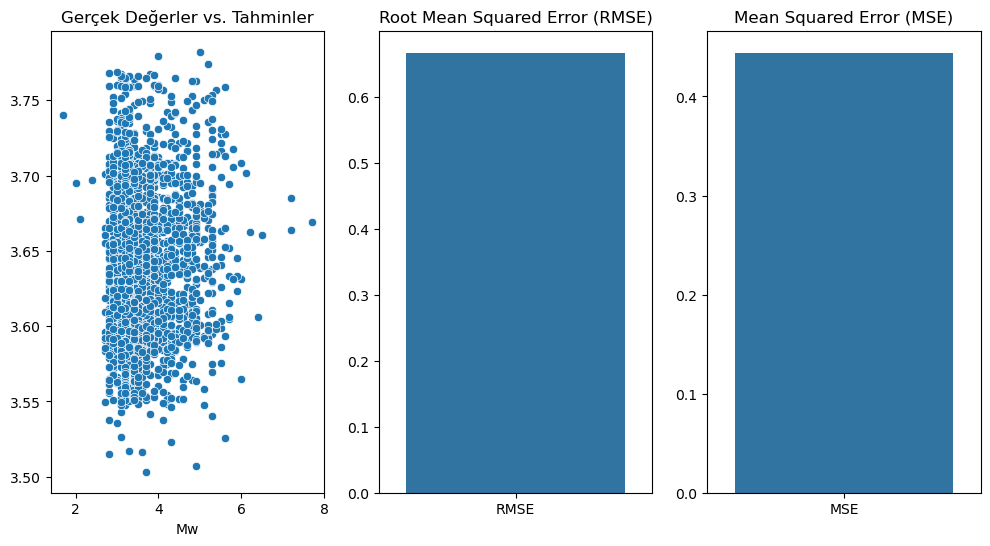

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek veri (gerçek verilerle değiştirilmeli)
y_true = y_mw_test  # Gerçek değerler
y_pred = mw_pred_bayesian  # Tahmin edilen değerler

# Hata hesaplamaları
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Grafik çizimi
plt.figure(figsize=(12, 6))

# Gerçek değerler vs. Tahmin edilen değerler scatter plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_true, y=y_pred)
plt.title("Gerçek Değerler vs. Tahminler")

# RMSE değeri
plt.subplot(1, 3, 2)
sns.barplot(x=["RMSE"], y=[rmse])
plt.title("Root Mean Squared Error (RMSE)")

# MSE değeri
plt.subplot(1, 3, 3)
sns.barplot(x=["MSE"], y=[mse])
plt.title("Mean Squared Error (MSE)")

plt.show()


### Convolutional Neural Networks (CNN)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Dense

In [33]:

# Cluster_1 veri setini oku
cluster_1

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y = cluster_1[['Mw', 'R']]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştır 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RNN modelini oluştur ve eğit
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(2))  # Çıktı boyutu 2 (Mw ve R tahminleri)

model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Tahmin yap
predictions_rnn = model_rnn.predict(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)))

# Hata ölçümlerini yazdır
mse_rnn = mean_squared_error(y_test, predictions_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, predictions_rnn)

print("RNN Results:")
print(f"Model MSE: {mse_rnn}")
print(f"Model RMSE: {rmse_rnn}")
print(f"Model R²: {r2_rnn}")



Epoch 1/50
242/242 [==============================] - 1s 2ms/step - loss: 35.2066 - val_loss: 29.6980
Epoch 2/50
242/242 [==============================] - 0s 1ms/step - loss: 26.7063 - val_loss: 29.7104
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 26.6766 - val_loss: 29.2208
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 26.4675 - val_loss: 29.0671
Epoch 5/50
242/242 [==============================] - 0s 1ms/step - loss: 26.3918 - val_loss: 28.8941
Epoch 6/50
242/242 [==============================] - 0s 2ms/step - loss: 26.2585 - val_loss: 28.6223
Epoch 7/50
242/242 [==============================] - 0s 1ms/step - loss: 26.0208 - val_loss: 28.3513
Epoch 8/50
242/242 [==============================] - 0s 1ms/step - loss: 25.8923 - val_loss: 29.3061
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 25.7750 - val_loss: 29.4162
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 25.6525

In [34]:
# Hata ölçümlerini yazdır
mse_rnn_mw = mean_squared_error(y_test['Mw'], predictions_rnn[:, 0])
rmse_rnn_mw = np.sqrt(mse_rnn_mw)
r2_rnn_mw = r2_score(y_test['Mw'], predictions_rnn[:, 0])

mse_rnn_r = mean_squared_error(y_test['R'], predictions_rnn[:, 1])
rmse_rnn_r = np.sqrt(mse_rnn_r)
r2_rnn_r = r2_score(y_test['R'], predictions_rnn[:, 1])

print("RNN Results:")
print(f"MW Model MSE: {mse_rnn_mw}")
print(f"MW Model RMSE: {rmse_rnn_mw}")
print(f"MW Model R²: {r2_rnn_mw}")

print(f"R Model MSE: {mse_rnn_r}")
print(f"R Model RMSE: {rmse_rnn_r}")
print(f"R Model R²: {r2_rnn_r}")


RNN Results:
MW Model MSE: 0.41016643631272315
MW Model RMSE: 0.6404423754817627
MW Model R²: 0.08193511375812323
R Model MSE: 46.51311749182074
R Model RMSE: 6.820052601836788
R Model R²: 0.1314296539012625


In [35]:
# Tahmin sonuçlarını göster
result_df_rnn = pd.DataFrame({'Actual_MW': y_test['Mw'], 'Predicted_MW': predictions_rnn[:, 0], 'Actual_R': y_test['R'], 'Predicted_R': predictions_rnn[:, 1]})
print(result_df_rnn)


       Actual_MW  Predicted_MW  Actual_R  Predicted_R
5092         3.7      3.338448       7.9     7.633636
10172        3.5      3.363807       5.4     7.353953
5003         2.8      3.537550      12.8     8.944817
5952         3.4      3.444297       7.2     9.686750
10431        4.1      3.508214       5.0     9.232959
...          ...           ...       ...          ...
6951         3.6      3.494787       5.0     7.130192
11802        5.3      3.395287      30.0     7.037064
4747         3.2      3.957906       1.8    12.921521
3181         4.7      3.411135       2.4     6.400052
9628         2.9      3.511397       5.4     9.602080

[2413 rows x 4 columns]


MSE: 23.7045, RMSE: 4.8687, R²: 0.1090
Bu değerler, genel modelin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçer. Yüksek MSE ve RMSE değerleri, modelin genel performansının belirgin hatalar içerdiğini gösterir. R² değeri de düşük olduğu için modelin genel veri setindeki varyansı açıklamakta zayıf olduğu söylenebilir.

MW Modeli:

MW Model MSE: 0.4040, MW Model RMSE: 0.6356, MW Model R²: 0.0958
MW değişkeni için elde edilen sonuçlar, genel modelin sonuçlarına benzer bir performans sergiliyor. MW için düşük MSE ve RMSE değerleri, ancak düşük R² değeri, modelin MW değişkenini iyi bir şekilde açıklamadığını gösterir.

R Modeli:

R Model MSE: 47.0051, R Model RMSE: 6.8560, R Model R²: 0.1222
R değişkeni için elde edilen sonuçlar, genel modelin sonuçlarına benzer bir performans sergiliyor. Yüksek MSE ve RMSE değerleri, ancak düşük R² değeri, modelin R değişkenini iyi bir şekilde açıklamadığını gösterir.

RNN modelinizin genel performansı, belirli bir ölçüde iyileştirilmesi gereken belirgin hatalar içeriyor gibi görünüyor. Özellikle R² değerlerinin düşük olması, modelin veriyi yeterince açıklayamadığını gösterir.
Her iki değişken için de RMSE değerleri düşük olduğundan, tahminlerin genel olarak gerçek değerlere yakın olduğunu söyleyebiliriz.

### Long Short-Term Memory (LSTM):

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [37]:
cluster_1

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y = cluster_1[['Mw', 'R']]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştır (önemli bir adım)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM modelini oluştur ve eğit
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(2))  # Çıktı boyutu 2 (Mw ve R tahminleri)

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Test verisi üzerinde tahmin yap
predictions_lstm = model_lstm.predict(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)))

# Hata ölçümlerini yazdır
mse_lstm_mw = mean_squared_error(y_test['Mw'], predictions_lstm[:, 0])
rmse_lstm_mw = np.sqrt(mse_lstm_mw)
r2_lstm_mw = r2_score(y_test['Mw'], predictions_lstm[:, 0])

mse_lstm_r = mean_squared_error(y_test['R'], predictions_lstm[:, 1])
rmse_lstm_r = np.sqrt(mse_lstm_r)
r2_lstm_r = r2_score(y_test['R'], predictions_lstm[:, 1])

print("LSTM Results:")
print(f"MW Model MSE: {mse_lstm_mw}")
print(f"MW Model RMSE: {rmse_lstm_mw}")
print(f"MW Model R²: {r2_lstm_mw}")

print(f"R Model MSE: {mse_lstm_r}")
print(f"R Model RMSE: {rmse_lstm_r}")
print(f"R Model R²: {r2_lstm_r}")



Epoch 1/50
242/242 [==============================] - 2s 3ms/step - loss: 38.8543 - val_loss: 30.2137
Epoch 2/50
242/242 [==============================] - 1s 2ms/step - loss: 26.9962 - val_loss: 29.5941
Epoch 3/50
242/242 [==============================] - 0s 2ms/step - loss: 26.8604 - val_loss: 29.6419
Epoch 4/50
242/242 [==============================] - 0s 2ms/step - loss: 26.7293 - val_loss: 29.4567
Epoch 5/50
242/242 [==============================] - 0s 2ms/step - loss: 26.5831 - val_loss: 29.2102
Epoch 6/50
242/242 [==============================] - 0s 2ms/step - loss: 26.4740 - val_loss: 29.1566
Epoch 7/50
242/242 [==============================] - 0s 2ms/step - loss: 26.4271 - val_loss: 28.9726
Epoch 8/50
242/242 [==============================] - 0s 2ms/step - loss: 26.3975 - val_loss: 29.0154
Epoch 9/50
242/242 [==============================] - 0s 2ms/step - loss: 26.2857 - val_loss: 29.0071
Epoch 10/50
242/242 [==============================] - 0s 2ms/step - loss: 26.2392

In [38]:
# Tahmin sonuçlarını yazdır
result_df_lstm = pd.DataFrame({'Actual_MW': y_test['Mw'], 'Predicted_MW': predictions_lstm[:, 0], 'Actual_R': y_test['R'], 'Predicted_R': predictions_lstm[:, 1]})
print(result_df_lstm)


       Actual_MW  Predicted_MW  Actual_R  Predicted_R
5092         3.7      3.176828       7.9     7.204964
10172        3.5      3.193693       5.4     7.652647
5003         2.8      3.932993      12.8     9.614705
5952         3.4      3.646657       7.2     9.565635
10431        4.1      3.581747       5.0     9.020782
...          ...           ...       ...          ...
6951         3.6      3.561782       5.0     6.749166
11802        5.3      3.647009      30.0     7.881684
4747         3.2      3.993527       1.8    12.775177
3181         4.7      3.520289       2.4     6.444395
9628         2.9      3.744806       5.4    10.554320

[2413 rows x 4 columns]


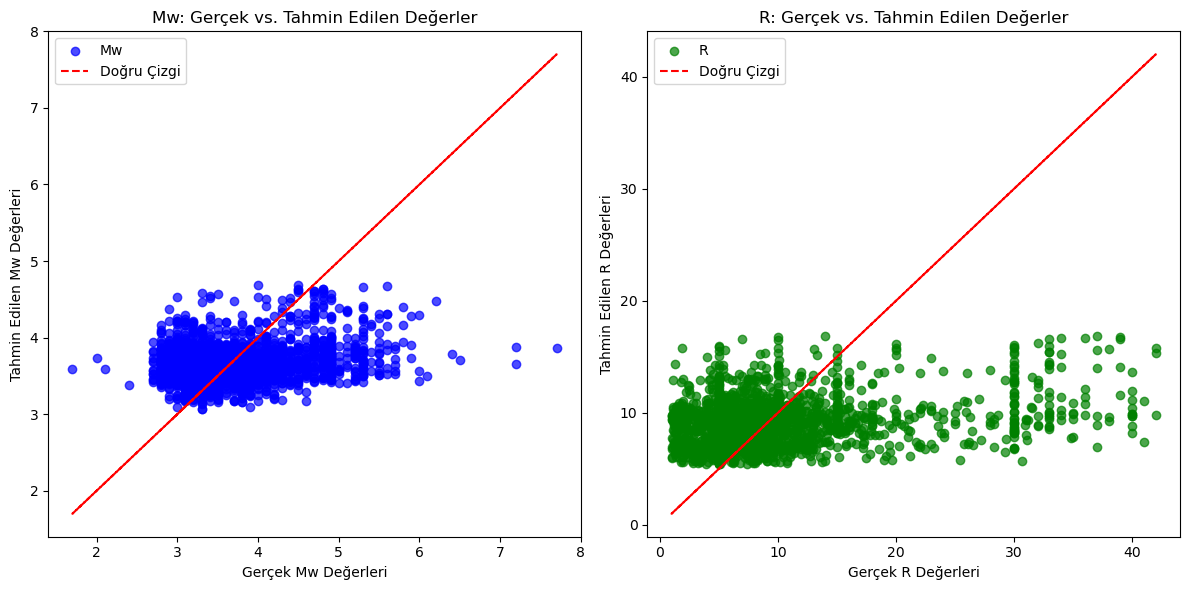

In [39]:
# Gerçek ve tahmin edilen değerleri içeren DataFrame'i kullanarak çizim yap

result_df_lstm = pd.DataFrame({'Actual_MW': y_test['Mw'], 'Predicted_MW': predictions_lstm[:, 0], 'Actual_R': y_test['R'], 'Predicted_R': predictions_lstm[:, 1]})

plt.figure(figsize=(12, 6))

# Mw için grafik
plt.subplot(1, 2, 1)
plt.scatter(result_df_lstm['Actual_MW'], result_df_lstm['Predicted_MW'], color='blue', label='Mw', alpha=0.7)
plt.plot(result_df_lstm['Actual_MW'], result_df_lstm['Actual_MW'], color='red', linestyle='--', label='Doğru Çizgi')
plt.xlabel('Gerçek Mw Değerleri')
plt.ylabel('Tahmin Edilen Mw Değerleri')
plt.title('Mw: Gerçek vs. Tahmin Edilen Değerler')
plt.legend()

# R için grafik
plt.subplot(1, 2, 2)
plt.scatter(result_df_lstm['Actual_R'], result_df_lstm['Predicted_R'], color='green', label='R', alpha=0.7)
plt.plot(result_df_lstm['Actual_R'], result_df_lstm['Actual_R'], color='red', linestyle='--', label='Doğru Çizgi')
plt.xlabel('Gerçek R Değerleri')
plt.ylabel('Tahmin Edilen R Değerleri')
plt.title('R: Gerçek vs. Tahmin Edilen Değerler')
plt.legend()

plt.tight_layout()
plt.show()


MW Modeli:

MW Model MSE: 0.4256, MW Model RMSE: 0.6524, MW Model R²: 0.0474
Bu değerler, MW tahminlerinin gerçek MW değerlerinden ne kadar uzak olduğunu ölçer. Düşük MSE ve RMSE değerleri, iyi bir tahmin performansını gösterir. Ancak R² değeri düşük olduğu için modelin MW değişkeninin varyansını açıklamakta zayıf olduğu söylenebilir.

R Modeli:

R Model MSE: 48.0923, R Model RMSE: 6.9349, R Model R²: 0.1019
R değişkeni için elde edilen sonuçlar, MW modeli ile benzer bir performans sergiliyor. Yüksek MSE ve RMSE değerleri, ancak düşük R² değeri, modelin R değişkenini iyi bir şekilde açıklamadığını gösterir.

LSTM modelinizin genel performansı, belirli bir ölçüde iyileştirilmesi gereken belirgin hatalar içeriyor gibi görünüyor. R² değerlerinin düşük olması, modelin veriyi yeterince açıklayamadığını gösterir.
RMSE değerleri düşük olduğundan, tahminlerin genel olarak gerçek değerlere yakın olduğunu söyleyebiliriz.
LSTM, zaman serisi verileri üzerinde özellikle iyi performans gösterebilen bir model türüdür. Ancak, daha fazla iyileştirme için modelin karmaşıklığı, veri seti üzerindeki özellikler, hiperparametre ayarları gibi faktörlerin gözden geçirilmesi önemlidir.

### Gated Recurrent Unit (GRU):



In [41]:
from keras.layers import GRU


In [42]:
# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y = cluster_1[['Mw', 'R']]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştır (önemli bir adım)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GRU modelini oluştur ve eğit
model_gru = Sequential()
model_gru.add(GRU(units=64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dense(2))  # Çıktı boyutu 2 (Mw ve R tahminleri)

model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Test verisi üzerinde tahmin yap
predictions_gru = model_gru.predict(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)))

# Hata ölçümlerini yazdır
mse_gru_mw = mean_squared_error(y_test['Mw'], predictions_gru[:, 0])
rmse_gru_mw = np.sqrt(mse_gru_mw)
r2_gru_mw = r2_score(y_test['Mw'], predictions_gru[:, 0])

mse_gru_r = mean_squared_error(y_test['R'], predictions_gru[:, 1])
rmse_gru_r = np.sqrt(mse_gru_r)
r2_gru_r = r2_score(y_test['R'], predictions_gru[:, 1])

print("GRU Results:")
print(f"MW Model MSE: {mse_gru_mw}")
print(f"MW Model RMSE: {rmse_gru_mw}")
print(f"MW Model R²: {r2_gru_mw}")

print(f"R Model MSE: {mse_gru_r}")
print(f"R Model RMSE: {rmse_gru_r}")
print(f"R Model R²: {r2_gru_r}")

# Tahmin sonuçlarını yazdır
result_df_gru = pd.DataFrame({'Actual_MW': y_test['Mw'], 'Predicted_MW': predictions_gru[:, 0], 'Actual_R': y_test['R'], 'Predicted_R': predictions_gru[:, 1]})
print(result_df_gru)

Epoch 1/50
242/242 [==============================] - 2s 2ms/step - loss: 37.0713 - val_loss: 30.0259
Epoch 2/50
242/242 [==============================] - 1s 2ms/step - loss: 26.9841 - val_loss: 29.5216
Epoch 3/50
242/242 [==============================] - 0s 2ms/step - loss: 26.8221 - val_loss: 29.2583
Epoch 4/50
242/242 [==============================] - 1s 2ms/step - loss: 26.6592 - val_loss: 29.2191
Epoch 5/50
242/242 [==============================] - 0s 2ms/step - loss: 26.4380 - val_loss: 28.9553
Epoch 6/50
242/242 [==============================] - 1s 2ms/step - loss: 26.2948 - val_loss: 28.8150
Epoch 7/50
242/242 [==============================] - 1s 2ms/step - loss: 26.2475 - val_loss: 28.5352
Epoch 8/50
242/242 [==============================] - 0s 2ms/step - loss: 26.0101 - val_loss: 28.6831
Epoch 9/50
242/242 [==============================] - 0s 2ms/step - loss: 25.9011 - val_loss: 28.3378
Epoch 10/50
242/242 [==============================] - 0s 2ms/step - loss: 25.7964

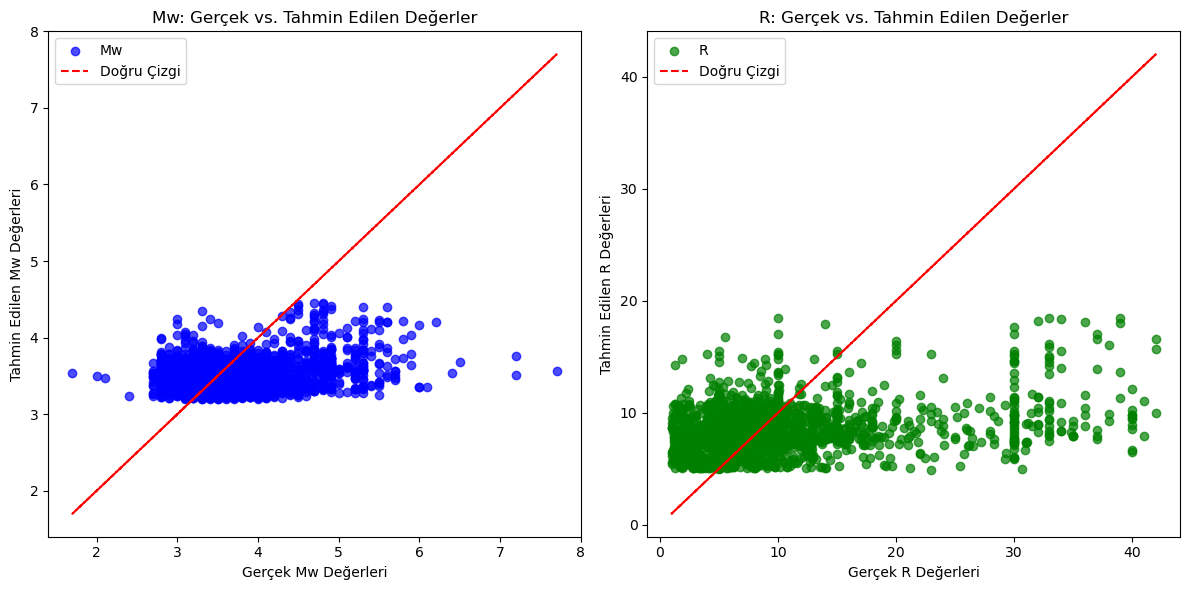

In [43]:
# Gerçek ve tahmin edilen değerleri içeren DataFrame'i kullanarak çizim yap
plt.figure(figsize=(12, 6))

# Mw için grafik
plt.subplot(1, 2, 1)
plt.scatter(result_df_gru['Actual_MW'], result_df_gru['Predicted_MW'], color='blue', label='Mw', alpha=0.7)
plt.plot(result_df_gru['Actual_MW'], result_df_gru['Actual_MW'], color='red', linestyle='--', label='Doğru Çizgi')
plt.xlabel('Gerçek Mw Değerleri')
plt.ylabel('Tahmin Edilen Mw Değerleri')
plt.title('Mw: Gerçek vs. Tahmin Edilen Değerler')
plt.legend()

# R için grafik
plt.subplot(1, 2, 2)
plt.scatter(result_df_gru['Actual_R'], result_df_gru['Predicted_R'], color='green', label='R', alpha=0.7)
plt.plot(result_df_gru['Actual_R'], result_df_gru['Actual_R'], color='red', linestyle='--', label='Doğru Çizgi')
plt.xlabel('Gerçek R Değerleri')
plt.ylabel('Tahmin Edilen R Değerleri')
plt.title('R: Gerçek vs. Tahmin Edilen Değerler')
plt.legend()

plt.tight_layout()
plt.show()


MW Modeli:

MW Model MSE: 0.4446, MW Model RMSE: 0.6668, MW Model R²: 0.0049
Bu değerler, MW tahminlerinin gerçek MW değerlerinden ne kadar uzak olduğunu ölçer. Düşük MSE ve RMSE değerleri, iyi bir tahmin performansını gösterir. Ancak R² değeri düşük olduğu için modelin MW değişkeninin varyansını açıklamakta zayıf olduğu söylenebilir.

R Modeli:

R Model MSE: 47.0404, R Model RMSE: 6.8586, R Model R²: 0.1216
R değişkeni için elde edilen sonuçlar, MW modeli ile benzer bir performans sergiliyor. Yüksek MSE ve RMSE değerleri, ancak düşük R² değeri, modelin R değişkenini iyi bir şekilde açıklamadığını gösterir.

In [11]:
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Girdi ve çıktı değişkenlerini belirle
X = cluster_1[['Enlem', 'Boylam', 'Aylar']]
y = cluster_1[['Mw', 'R']]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştır (önemli bir adım)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NAS modelini oluştur ve eğit
regressor = ak.StructuredDataRegressor(max_trials=10)  # Max_trials parametresi optimize edilecek model sayısını belirler
regressor.fit(X_train_scaled, y_train, epochs=50)

# Test verisi üzerinde tahmin yap
predictions_nas = regressor.predict(X_test_scaled)

# Hata ölçümlerini yazdır
mse_nas_mw = mean_squared_error(y_test['Mw'], predictions_nas[:, 0])
rmse_nas_mw = np.sqrt(mse_nas_mw)
r2_nas_mw = r2_score(y_test['Mw'], predictions_nas[:, 0])

mse_nas_r = mean_squared_error(y_test['R'], predictions_nas[:, 1])
rmse_nas_r = np.sqrt(mse_nas_r)
r2_nas_r = r2_score(y_test['R'], predictions_nas[:, 1])

print("NAS Results:")
print(f"MW Model MSE: {mse_nas_mw}")
print(f"MW Model RMSE: {rmse_nas_mw}")
print(f"MW Model R²: {r2_nas_mw}")

print(f"R Model MSE: {mse_nas_r}")
print(f"R Model RMSE: {rmse_nas_r}")
print(f"R Model R²: {r2_nas_r}")
print("Predictions:")
print(predictions_nas)


Reloading Tuner from .\structured_data_regressor\tuner0.json
Epoch 1/50
302/302 [==============================] - 1s 1ms/step - loss: 35.2900 - mean_squared_error: 35.2900
Epoch 2/50
302/302 [==============================] - 0s 1ms/step - loss: 27.6469 - mean_squared_error: 27.6469
Epoch 3/50
302/302 [==============================] - 0s 1ms/step - loss: 27.3521 - mean_squared_error: 27.3521
Epoch 4/50
302/302 [==============================] - 0s 1ms/step - loss: 27.1447 - mean_squared_error: 27.1447
Epoch 5/50
302/302 [==============================] - 0s 1ms/step - loss: 26.9500 - mean_squared_error: 26.9500
Epoch 6/50
302/302 [==============================] - 0s 1ms/step - loss: 26.7779 - mean_squared_error: 26.7779
Epoch 7/50
302/302 [==============================] - 0s 1ms/step - loss: 26.6089 - mean_squared_error: 26.6089
Epoch 8/50
302/302 [==============================] - 0s 1ms/step - loss: 26.4241 - mean_squared_error: 26.4241
Epoch 9/50
302/302 [=======================